In [9]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
names = []
for root, dirs, files in os.walk("./df"):
    for filename in files:
        names.append(filename)

In [3]:
df2 = pd.read_csv(r'.\df2.csv')
df2.shape

(15, 2)

In [4]:
df2

,id,label
0,df8.jpg,df
1,df9.jpg,df
2,df4.jpg,df
3,df11.jpg,df
4,df10.jpg,df
5,df5.jpg,df
6,df7.jpg,df
7,df12.jpg,df
8,df13.jpg,df
9,df6.jpg,df


In [5]:
df = pd.read_csv(r'.\train2.csv')
df.shape

(14686, 2)

In [6]:
newdf = df.append(df2,True)
newdf.to_csv("train3.csv",index=False)

Found 15 validated image filenames.


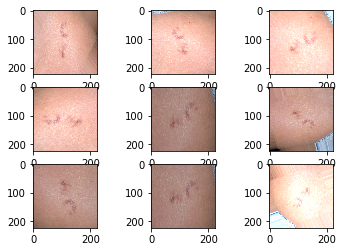

1
1
1
1


In [10]:
dim_size=224
batch_size=1
df = pd.read_csv("df2.csv")
# load the image
img = load_img('demo.jpg',target_size=(224,224))
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
            #rescale = 1./255,
            rotation_range = 100,
            brightness_range = [.5,1.5],
            shear_range = 0.2,
            zoom_range = 0.4,
            horizontal_flip = True,
            vertical_flip = True
        )
# prepare iterator
it = datagen.flow(samples, batch_size=2)
it2 = datagen.flow_from_dataframe(
   dataframe = df, 
   directory = "df", 
   x_col = "id",
   class_mode = None, 
   target_size = (dim_size,dim_size), 
   batch_size = batch_size
)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
print(len(it2.next()))
print(len(it2.next()))
print(len(it2.next()))
print(len(it2.next()))

In [13]:
def df_to_arr(df,label):
    arr = []
    for i in df.loc[df['label'] == label, 'id']:
        arr.append(i)
    return arr
    
def arr_to_df(arr,label):
    return pd.DataFrame({'id':arr, 'label':label})
    
def augment(arr,amount,dim=224,path='.'):
    new_arr = []
    for x in arr:
        img_name = x.split('.')[0]
        img = load_img(path+'/'+x, target_size=(dim,dim))
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)
        datagen = ImageDataGenerator(
            #rescale = 1./255,
            rotation_range = 100,
            brightness_range = [.2,1.5],
            shear_range = 0.2,
            zoom_range = 0.4,
            horizontal_flip = True,
            vertical_flip = True
        )
        it = datagen.flow(samples, batch_size=1)
        for i in range(amount):
            new_name = img_name+'_Aug'+str(i)+'.jpg'
            image = it.next()[0]
            save_img('aug/'+new_name, image)
            new_arr.append(new_name)
    return new_arr


def main(csv, path='.'):  
    labels = [('bkl',5),('bcc',10),('akiec',16),('vasc',36),('df',40)]
    df = pd.read_csv('./' + csv)
    aug_df = pd.DataFrame()
    
    for label in labels:
        arr = df_to_arr(df,label[0])
        new_arr = augment(arr,label[1],path=path)
        de = arr_to_df(new_arr,label[0])
        aug_df = aug_df.append(de, ignore_index=True)
        
    aug_df = aug_df.drop_duplicates()
    aug_df.to_csv("aug.csv",index=False)
        

In [14]:
main('train3.csv',path='train_images')

In [16]:
d1 = pd.read_csv(r'.\train3.csv')
d2 = pd.read_csv(r'.\aug.csv')
newd = d1.append(d2,True)
newd = newd.drop_duplicates()
newd.to_csv("train.csv",index=False)

In [20]:
newd = newd.drop_duplicates()
print(d1.shape)
print(d2.shape)
print(newd.shape)

(14701, 2)
(26179, 2)
(40880, 2)
